In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
from dynamic_panel_dgp import DynamicPanelDGP
import matplotlib.pyplot as plt
import scipy 
from coverage_panel import add_vlines

In [19]:
import os
import joblib
n_exps = 10
dirname = os.path.join('results', 'constant')
param_str = ("n_exps_{}_n_units_500_n_periods_3_n_t_2_n_x_450_s_x_2"
              "_s_t_2_sigma_x_1_sigma_t_1_sigma_y_1_conf_str_1_gamma_0.2").format(n_exps)
results = joblib.load(os.path.join(dirname, "results_{}.jbl".format(param_str)))
dgp = joblib.load(os.path.join(dirname, "dgp_obj_{}.jbl".format(param_str)))

In [20]:
n_periods = dgp.n_periods
n_treatments = dgp.n_treatments

In [21]:
results = np.array(results)
points = results[:, 0]
lowers = results[:, 1]
uppers = results[:, 2]
stderrs = results[:, 3]

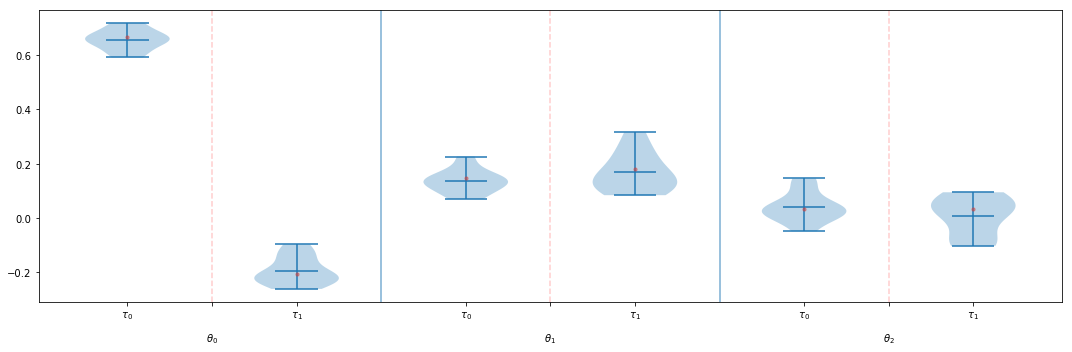

In [22]:
true_effect_params = dgp.true_effect.flatten()

plt.figure(figsize=(15, 5))
inds = np.arange(points.shape[1])
plt.violinplot(points, positions=inds, showmeans=True)
plt.scatter(inds, true_effect_params, marker='o',
            color='#D43F3A', s=10, zorder=3, alpha=.5)
add_vlines(n_periods, n_treatments)
plt.show()

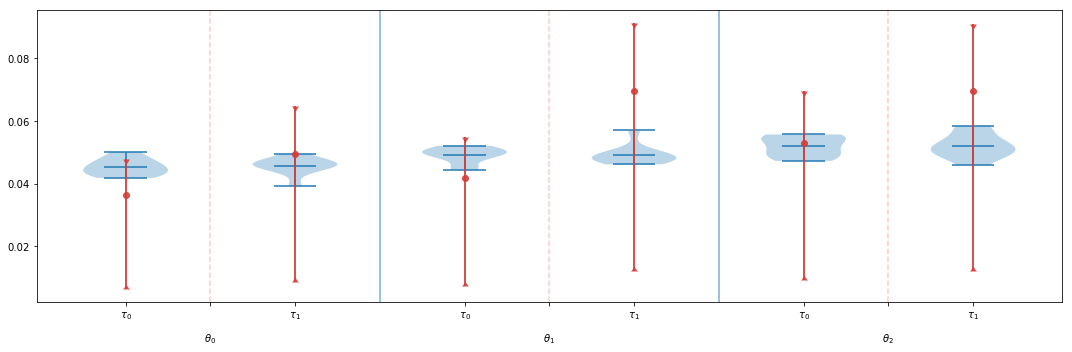

In [23]:
plt.figure(figsize=(15, 5))
inds = np.arange(points.shape[1])
plt.violinplot(stderrs, positions=inds, showmeans=True)
true_std = np.std(points, axis=0)
true_std_error = (true_std * (np.sqrt((n_exps-1)/scipy.stats.chi2.ppf((1-.05/2), n_exps-1)) - 1),
                  true_std * (1 - np.sqrt((n_exps-1)/scipy.stats.chi2.ppf((.05/2), n_exps-1))))
plt.errorbar(inds, true_std, yerr=true_std_error, fmt='o',
            color='#D43F3A', elinewidth=2, alpha=.9, capthick=.5, uplims=True, lolims=True)
add_vlines(n_periods, n_treatments)
plt.show()

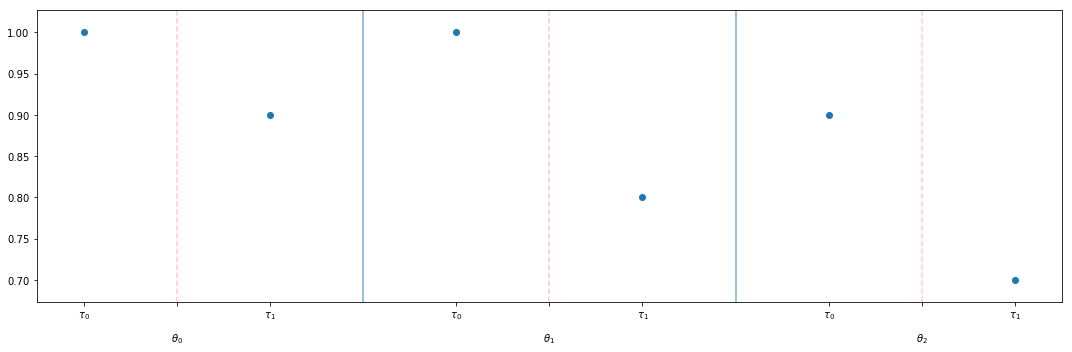

In [24]:
coverage = np.mean((true_effect_params.reshape(1, -1) <= uppers) & (
    true_effect_params.reshape(1, -1) >= lowers), axis=0)
plt.figure(figsize=(15, 5))
inds = np.arange(points.shape[1])
plt.scatter(inds, coverage)
add_vlines(n_periods, n_treatments)
plt.show()